In [38]:
'''Importing Run2 data and calculating parameters'''


import ROOT as R
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams.update({'font.size': 16}) # making all graphs fontsize 16


# location run2 file
floc = '/home/sander/Bachelor research project/root files/'
fname = 'Lb2LEE_procTuple_full.root'
treename = 'DecayTree;23'


# data
R.ROOT.EnableImplicitMT()
rdf = R.RDataFrame(treename,floc+fname)

# use pandas
observables = ['Lb_BKGCAT', 'L1_HasBremAdded', 'L2_HasBremAdded',
'L0_TRUEP_E', 'L0_TRUEP_X', 'L0_TRUEP_Y', 'L0_TRUEP_Z', 
'Lb_TRUEP_E', 'Lb_TRUEP_X', 'Lb_TRUEP_Y', 'Lb_TRUEP_Z',
'L1_TRUEP_E', 'L1_TRUEP_X', 'L1_TRUEP_Y', 'L1_TRUEP_Z', 'L1_TRUEPT',
'L2_TRUEP_E','L2_TRUEP_X', 'L2_TRUEP_Y', 'L2_TRUEP_Z', 'L2_TRUEPT',
'L0_PE', 'L0_PX', 'L0_PY', 'L0_PZ',
'Lb_PE', 'Lb_PX', 'Lb_PY', 'Lb_PZ',
'L1_PE', 'L1_PX', 'L1_PY', 'L1_PZ', 'L1_PT',
'L2_PE', 'L2_PX', 'L2_PY', 'L2_PZ', 'L2_PT'
]

df = pd.DataFrame(rdf.AsNumpy(observables))


pz_mask = (df['L1_TRUEP_Z']>1000) & (df['L2_TRUEP_Z']>1000) # cutting out the weird <1000 MeV TRUEP_Z values


# bkgcat has 10, 50, 60
bkgcat_mask = (df['Lb_BKGCAT']==10) | (df['Lb_BKGCAT']==50)
brem1_mask = (df['L1_HasBremAdded']==1) & (df['L2_HasBremAdded']==0) # mask l1 has bremadded
brem2_mask = (df['L2_HasBremAdded']==1) & (df['L1_HasBremAdded']==0) # mask l2 has bremadded
brem0_mask = (df['L1_HasBremAdded']==0) & (df['L2_HasBremAdded']==0) # mask no bremadded
bremboth_mask = (df['L1_HasBremAdded']==1) & (df['L2_HasBremAdded']==1) 
bremsingle_mask = brem1_mask | brem2_mask


df_nocut = df[bkgcat_mask] # mask so I can compare cut with no cut
df = df[bkgcat_mask & pz_mask]

# different dataframes with different brem masks
dfB1 = df[bremsingle_mask] # B1 denotes 1e has bremadded
dfB0 = df[brem0_mask] # B0 denotes no e have bremadded
dfB2 = df[bremboth_mask] # B2 denotes both e have bremadded



'''---------------------------Reconstructing leptonic variables-----------------------------------'''

# Reconstructing variables for different bremadded - TRUE - Leptonic (P and PE are squared values of momentum and energy)


ee_TRUE_P_lep = (df['L1_TRUEP_X']+df['L2_TRUEP_X'])**2 + (df['L1_TRUEP_Y']+df['L2_TRUEP_Y'])**2 + (df['L1_TRUEP_Z']+df['L2_TRUEP_Z'])**2
ee_TRUE_PE_lep = (df['L1_TRUEP_E'] + df['L2_TRUEP_E'])**2
ee_TRUE_M_lep = np.sqrt(ee_TRUE_PE_lep - ee_TRUE_P_lep)

ee_TRUE_P_lep_B0 = (dfB0['L1_TRUEP_X']+dfB0['L2_TRUEP_X'])**2 + (dfB0['L1_TRUEP_Y']+dfB0['L2_TRUEP_Y'])**2 + (dfB0['L1_TRUEP_Z']+dfB0['L2_TRUEP_Z'])**2
ee_TRUE_PE_lep_B0 = (dfB0['L1_TRUEP_E'] + dfB0['L2_TRUEP_E'])**2
ee_TRUE_M_lep_B0 = np.sqrt(ee_TRUE_PE_lep_B0 - ee_TRUE_P_lep_B0)


ee_TRUE_P_lep_B1 = (dfB1['L1_TRUEP_X']+dfB1['L2_TRUEP_X'])**2 + (dfB1['L1_TRUEP_Y']+dfB1['L2_TRUEP_Y'])**2 + (dfB1['L1_TRUEP_Z']+dfB1['L2_TRUEP_Z'])**2
ee_TRUE_PE_lep_B1 = (dfB1['L1_TRUEP_E'] + dfB1['L2_TRUEP_E'])**2
ee_TRUE_M_lep_B1 = np.sqrt(ee_TRUE_PE_lep_B1 - ee_TRUE_P_lep_B1)

ee_TRUE_P_lep_B2 = (dfB2['L1_TRUEP_X']+dfB2['L2_TRUEP_X'])**2 + (dfB2['L1_TRUEP_Y']+dfB2['L2_TRUEP_Y'])**2 + (dfB2['L1_TRUEP_Z']+dfB2['L2_TRUEP_Z'])**2
ee_TRUE_PE_lep_B2 = (dfB2['L1_TRUEP_E'] + dfB2['L2_TRUEP_E'])**2
ee_TRUE_M_lep_B2 = np.sqrt(ee_TRUE_PE_lep_B2 - ee_TRUE_P_lep_B2)


# Reconstructing variables - REC - Leptonic (P and PE are squared values of momentum and energy)

ee_REC_P_lep = (df['L1_PX']+df['L2_PX'])**2 + (df['L1_PY']+df['L2_PY'])**2 + (df['L1_PZ']+df['L2_PZ'])**2
ee_REC_PE_lep = (df['L1_PE'] + df['L2_PE'])**2
ee_REC_M_lep = np.sqrt(ee_REC_PE_lep - ee_REC_P_lep)


ee_REC_P_lep_B0 = (dfB0['L1_PX']+dfB0['L2_PX'])**2 + (dfB0['L1_PY']+dfB0['L2_PY'])**2 + (dfB0['L1_PZ']+dfB0['L2_PZ'])**2
ee_REC_PE_lep_B0 = (dfB0['L1_PE'] + dfB0['L2_PE'])**2
ee_REC_M_lep_B0 = np.sqrt(ee_REC_PE_lep_B0 - ee_REC_P_lep_B0)


ee_REC_P_lep_B1 = (dfB1['L1_PX']+dfB1['L2_PX'])**2 + (dfB1['L1_PY']+dfB1['L2_PY'])**2 + (dfB1['L1_PZ']+dfB1['L2_PZ'])**2
ee_REC_PE_lep_B1 = (dfB1['L1_PE'] + dfB1['L2_PE'])**2
ee_REC_M_lep_B1 = np.sqrt(ee_REC_PE_lep_B1 - ee_REC_P_lep_B1)

ee_REC_P_lep_B2 = (dfB2['L1_PX']+dfB2['L2_PX'])**2 + (dfB2['L1_PY']+dfB2['L2_PY'])**2 + (dfB2['L1_PZ']+dfB2['L2_PZ'])**2
ee_REC_PE_lep_B2 = (dfB2['L1_PE'] + dfB2['L2_PE'])**2
ee_REC_M_lep_B2 = np.sqrt(ee_REC_PE_lep_B2 - ee_REC_P_lep_B2)


'''---------------------------Reconstructing hadronic variables-----------------------------------'''

# Reconstructing variables - TRUE - Hadronic (P and PE are squared values of momentum and energy)
ee_TRUE_P_hadr_B2 = (dfB2['Lb_TRUEP_X']-dfB2['L0_TRUEP_X'])**2 + (dfB2['Lb_TRUEP_Y']-dfB2['L0_TRUEP_Y'])**2 + (dfB2['Lb_TRUEP_Z']-dfB2['L0_TRUEP_Z'])**2
ee_TRUE_PE_hadr_B2 = (dfB2['Lb_TRUEP_E'] - dfB2['L0_TRUEP_E'])**2
ee_TRUE_M_hadr_B2 = np.sqrt(ee_TRUE_PE_hadr_B2 - ee_TRUE_P_hadr_B2)


# Reconstructing variables - REC - Hadronic (P and PE are squared values of momentum and energy)
ee_REC_P_hadr_B2 = (dfB2['Lb_PX']-dfB2['L0_PX'])**2 + (dfB2['Lb_PY']-dfB2['L0_PY'])**2 + (dfB2['Lb_PZ']-dfB2['L0_PZ'])**2
ee_REC_PE_hadr_B2 = (dfB2['Lb_PE'] - dfB2['L0_PE'])**2
ee_REC_M_hadr_B2 = np.sqrt(ee_REC_PE_hadr_B2 - ee_REC_P_hadr_B2)




'''---------------------------Momentum and mass resolution variables-----------------------------------'''



res_lep = (ee_REC_M_lep - ee_TRUE_M_lep) / ee_TRUE_M_lep
res_lep = res_lep[abs(res_lep) <1] #cutting out outliers in inv mass

res_lep_B0 = (ee_REC_M_lep_B0 - ee_TRUE_M_lep_B0) / ee_TRUE_M_lep_B0
res_lep_B0 = res_lep_B0[abs(res_lep_B0) <1] #cutting out outliers in inv mass

res_lep_B1 = (ee_REC_M_lep_B1 - ee_TRUE_M_lep_B1) / ee_TRUE_M_lep_B1
res_lep_B1 = res_lep_B1[abs(res_lep_B1) <1]

res_lep_B2 = (ee_REC_M_lep_B2 - ee_TRUE_M_lep_B2) / ee_TRUE_M_lep_B2
res_lep_B2 = res_lep_B2[abs(res_lep_B2) <1] 

res_hadr_B2 =  (ee_REC_M_hadr_B2 - ee_TRUE_M_hadr_B2) / ee_TRUE_M_hadr_B2
res_hadr_B2 = res_hadr_B2[abs(res_hadr_B2) <1]

diff_TRUE_M_LH = ee_TRUE_M_lep_B2 - ee_TRUE_M_hadr_B2 
diff_REC_M_LH = ee_REC_M_lep_B2 - ee_REC_M_hadr_B2




'''---------------------------PZ and PT for individual electrons-----------------------------------'''


# following masks are used for bremadded category for individual electrons (PZ and PT plots)
df_L1Added = df[(df['L1_HasBremAdded']==1)]
df_L2Added = df[(df['L2_HasBremAdded']==1)]
df_L1NotAdded = df[(df['L1_HasBremAdded']==0)]
df_L2NotAdded = df[(df['L2_HasBremAdded']==0)]


e_TRUE_PZ_B0 = pd.concat([df_L1NotAdded['L1_TRUEP_Z'], df_L2NotAdded['L2_TRUEP_Z']], ignore_index=True)
e_REC_PZ_B0 = pd.concat([df_L1NotAdded['L1_PZ'], df_L2NotAdded['L2_PZ']], ignore_index=True)
e_TRUE_PZ_B1 = pd.concat([df_L1Added['L1_TRUEP_Z'], df_L2Added['L2_TRUEP_Z']], ignore_index=True)
e_REC_PZ_B1 = pd.concat([df_L1Added['L1_PZ'], df_L2Added['L2_PZ']], ignore_index=True)

e_res_PZ_B0 = (e_REC_PZ_B0 - e_TRUE_PZ_B0)/ e_TRUE_PZ_B0
e_res_PZ_B0 = e_res_PZ_B0[abs(e_res_PZ_B0) < 1]
e_res_PZ_B1 = (e_REC_PZ_B1 - e_TRUE_PZ_B1)/ e_TRUE_PZ_B1
e_res_PZ_B1 = e_res_PZ_B1[abs(e_res_PZ_B1) < 1]


e_TRUE_PT_B0 = pd.concat([df_L1NotAdded['L1_TRUEPT'], df_L2NotAdded['L2_TRUEPT']], ignore_index=True)
e_REC_PT_B0 = pd.concat([df_L1NotAdded['L1_PT'], df_L2NotAdded['L2_PT']], ignore_index=True)
e_TRUE_PT_B1 = pd.concat([df_L1Added['L1_TRUEPT'], df_L2Added['L2_TRUEPT']], ignore_index=True)
e_REC_PT_B1 = pd.concat([df_L1Added['L1_PT'], df_L2Added['L2_PT']], ignore_index=True)

e_res_PT_B0 = (e_REC_PT_B0 - e_TRUE_PT_B0)/ e_TRUE_PT_B0
e_res_PT_B0 = e_res_PT_B0[abs(e_res_PT_B0) < 1]
e_res_PT_B1 = (e_REC_PT_B1 - e_TRUE_PT_B1)/ e_TRUE_PT_B1
e_res_PT_B1 = e_res_PT_B1[abs(e_res_PT_B1) < 1]


PT_max_TRUE = df[['L1_TRUEPT', 'L2_TRUEPT']].max(axis=1)
PT_max_REC = df[['L1_PT', 'L2_PT']].max(axis=1)




/tmp/ipykernel_42800/3801271463.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB1 = df[bremsingle_mask] # B1 denotes 1e has bremadded
/tmp/ipykernel_42800/3801271463.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB0 = df[brem0_mask] # B0 denotes no e have bremadded
/tmp/ipykernel_42800/3801271463.py:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB2 = df[bremboth_mask] # B2 denotes both e have bremadded
/home/sander/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
'''
Importing Run3 data and calculating parameters 

(this block is the same as above but then for upgrade. Variables have UP in their name so no variables get mixed up)
'''

# location 
flocUP = '/home/sander/Bachelor research project/root files/'
fnameUP = 'ntuples_mc_lb2lee_upgrade.root'
treenameUP = 'TupleLb2Lee/DecayTree;1'

# data
R.ROOT.EnableImplicitMT()
rdfUP = R.RDataFrame(treenameUP,flocUP+fnameUP)

# use pandas
observablesUP = ['Lb_BKGCAT',
'L0_TRUEP_E', 'L0_TRUEP_X', 'L0_TRUEP_Y', 'L0_TRUEP_Z', 
'Lb_TRUEP_E', 'Lb_TRUEP_X', 'Lb_TRUEP_Y', 'Lb_TRUEP_Z',
'em_TRUEP_E', 'em_TRUEP_X', 'em_TRUEP_Y', 'em_TRUEP_Z', 'em_TRUEPT',
'ep_TRUEP_E','ep_TRUEP_X', 'ep_TRUEP_Y', 'ep_TRUEP_Z', 'ep_TRUEPT',
'L0_PE', 'L0_PX', 'L0_PY', 'L0_PZ',
'Lb_PE', 'Lb_PX', 'Lb_PY', 'Lb_PZ',
'em_PE', 'em_PX', 'em_PY', 'em_PZ', 'em_PT',
'ep_PE', 'ep_PX', 'ep_PY', 'ep_PZ', 'ep_PT',
'Lb_M',
'em_PP_CaloHasBrem', 'ep_PP_CaloHasBrem'
]


dfUP = pd.DataFrame(rdfUP.AsNumpy(observablesUP))


# bkgcat has 10, 30, 40, 50, 60, 63, 66, 70, 80, 100, 110, 120, 130 
bkgcat_maskUP = (dfUP['Lb_BKGCAT']==10) | (dfUP['Lb_BKGCAT']==50)
pz_maskUP = (dfUP['em_TRUEP_Z']>1000) & (dfUP['ep_TRUEP_Z']>1000) # cutting out the weird <1000 MeV TRUEP_Z values


brem1_maskUP = (dfUP['em_PP_CaloHasBrem']==1) & (dfUP['ep_PP_CaloHasBrem']==0) # l1 bremadded
brem2_maskUP = (dfUP['ep_PP_CaloHasBrem']==1) & (dfUP['em_PP_CaloHasBrem']==0) # l2 bremadded
brem0_maskUP = (dfUP['em_PP_CaloHasBrem']==0) & (dfUP['ep_PP_CaloHasBrem']==0) # no bremadded
bremboth_maskUP = (dfUP['em_PP_CaloHasBrem']==1) & (dfUP['ep_PP_CaloHasBrem']==1) # both bremadded
bremsingle_maskUP = brem1_maskUP | brem2_maskUP # 1e bremadded

dfUP_nocut = dfUP[bkgcat_maskUP] # mask so I can compare cut with no cut
dfUP = dfUP[bkgcat_maskUP & pz_maskUP]

# different df for different brem categories
dfB0UP = dfUP[brem0_maskUP]
dfB1UP = dfUP[bremsingle_maskUP]
dfB2UP = dfUP[bremboth_maskUP]


'''---------------------------Reconstructing leptonic variables-----------------------------------'''

# Reconstructing variables for different bremadded - TRUE - Leptonic (P and PE are squared values of momentum and energy)

ee_TRUE_P_lep_UP = (dfUP['em_TRUEP_X']+dfUP['ep_TRUEP_X'])**2 + (dfUP['em_TRUEP_Y']+dfUP['ep_TRUEP_Y'])**2 + (dfUP['em_TRUEP_Z']+dfUP['ep_TRUEP_Z'])**2
ee_TRUE_PE_lep_UP = (dfUP['em_TRUEP_E'] + dfUP['ep_TRUEP_E'])**2
ee_TRUE_M_lep_UP = np.sqrt(ee_TRUE_PE_lep_UP - ee_TRUE_P_lep_UP)

ee_TRUE_P_lep_B0_UP = (dfB0UP['em_TRUEP_X']+dfB0UP['ep_TRUEP_X'])**2 + (dfB0UP['em_TRUEP_Y']+dfB0UP['ep_TRUEP_Y'])**2 + (dfB0UP['em_TRUEP_Z']+dfB0UP['ep_TRUEP_Z'])**2
ee_TRUE_PE_lep_B0_UP = (dfB0UP['em_TRUEP_E'] + dfB0UP['ep_TRUEP_E'])**2
ee_TRUE_M_lep_B0_UP = np.sqrt(ee_TRUE_PE_lep_B0_UP - ee_TRUE_P_lep_B0_UP)

ee_TRUE_P_lep_B1_UP = (dfB1UP['em_TRUEP_X']+dfB1UP['ep_TRUEP_X'])**2 + (dfB1UP['em_TRUEP_Y']+dfB1UP['ep_TRUEP_Y'])**2 + (dfB1UP['em_TRUEP_Z']+dfB1UP['ep_TRUEP_Z'])**2
ee_TRUE_PE_lep_B1_UP = (dfB1UP['em_TRUEP_E'] + dfB1UP['ep_TRUEP_E'])**2
ee_TRUE_M_lep_B1_UP = np.sqrt(ee_TRUE_PE_lep_B1_UP - ee_TRUE_P_lep_B1_UP)

ee_TRUE_P_lep_B2_UP = (dfB2UP['em_TRUEP_X']+dfB2UP['ep_TRUEP_X'])**2 + (dfB2UP['em_TRUEP_Y']+dfB2UP['ep_TRUEP_Y'])**2 + (dfB2UP['em_TRUEP_Z']+dfB2UP['ep_TRUEP_Z'])**2
ee_TRUE_PE_lep_B2_UP = (dfB2UP['em_TRUEP_E'] + dfB2UP['ep_TRUEP_E'])**2
ee_TRUE_M_lep_B2_UP = np.sqrt(ee_TRUE_PE_lep_B2_UP - ee_TRUE_P_lep_B2_UP)


# inv mass for the 'nocut' plot
ee_TRUE_P_lep_UP_nocut = (dfUP_nocut['em_TRUEP_X']+dfUP_nocut['ep_TRUEP_X'])**2 + (dfUP_nocut['em_TRUEP_Y']+dfUP_nocut['ep_TRUEP_Y'])**2 + (dfUP_nocut['em_TRUEP_Z']+dfUP_nocut['ep_TRUEP_Z'])**2
ee_TRUE_PE_lep_UP_nocut = (dfUP_nocut['em_TRUEP_E'] + dfUP_nocut['ep_TRUEP_E'])**2
ee_TRUE_M_lep_UP_nocut = np.sqrt(ee_TRUE_PE_lep_UP_nocut - ee_TRUE_P_lep_UP_nocut)



# Reconstructing variables - REC - Leptonic (P and PE are squared values of momentum and energy)

ee_REC_P_lep_UP = (dfUP['em_PX']+dfUP['ep_PX'])**2 + (dfUP['em_PY']+dfUP['ep_PY'])**2 + (dfUP['em_PZ']+dfUP['ep_PZ'])**2
ee_REC_PE_lep_UP = (dfUP['em_PE'] + dfUP['ep_PE'])**2
ee_REC_M_lep_UP = np.sqrt(ee_REC_PE_lep_UP - ee_REC_P_lep_UP)

ee_REC_P_lep_B0_UP = (dfB0UP['em_PX']+dfB0UP['ep_PX'])**2 + (dfB0UP['em_PY']+dfB0UP['ep_PY'])**2 + (dfB0UP['em_PZ']+dfB0UP['ep_PZ'])**2
ee_REC_PE_lep_B0_UP = (dfB0UP['em_PE'] + dfB0UP['ep_PE'])**2
ee_REC_M_lep_B0_UP = np.sqrt(ee_REC_PE_lep_B0_UP - ee_REC_P_lep_B0_UP)

ee_REC_P_lep_B1_UP = (dfB1UP['em_PX']+dfB1UP['ep_PX'])**2 + (dfB1UP['em_PY']+dfB1UP['ep_PY'])**2 + (dfB1UP['em_PZ']+dfB1UP['ep_PZ'])**2
ee_REC_PE_lep_B1_UP = (dfB1UP['em_PE'] + dfB1UP['ep_PE'])**2
ee_REC_M_lep_B1_UP = np.sqrt(ee_REC_PE_lep_B1_UP - ee_REC_P_lep_B1_UP)

ee_REC_P_lep_B2_UP = (dfB2UP['em_PX']+dfB2UP['ep_PX'])**2 + (dfB2UP['em_PY']+dfB2UP['ep_PY'])**2 + (dfB2UP['em_PZ']+dfB2UP['ep_PZ'])**2
ee_REC_PE_lep_B2_UP = (dfB2UP['em_PE'] + dfB2UP['ep_PE'])**2
ee_REC_M_lep_B2_UP = np.sqrt(ee_REC_PE_lep_B2_UP - ee_REC_P_lep_B2_UP)


# inv mass for the 'nocut' plot
ee_REC_P_lep_UP_nocut = (dfUP_nocut['em_PX']+dfUP_nocut['ep_PX'])**2 + (dfUP_nocut['em_PY']+dfUP_nocut['ep_PY'])**2 + (dfUP_nocut['em_PZ']+dfUP_nocut['ep_PZ'])**2
ee_REC_PE_lep_UP_nocut = (dfUP_nocut['em_PE'] + dfUP_nocut['ep_PE'])**2
ee_REC_M_lep_UP_nocut = np.sqrt(ee_REC_PE_lep_UP_nocut - ee_REC_P_lep_UP_nocut)


'''---------------------------Reconstructing hadronic variables-----------------------------------'''


# Reconstructing variables - TRUE - Hadronic (P and PE are squared values of momentum and energy)
ee_TRUE_P_hadr_B2_UP = (dfB2UP['Lb_TRUEP_X']-dfB2UP['L0_TRUEP_X'])**2 + (dfB2UP['Lb_TRUEP_Y']-dfB2UP['L0_TRUEP_Y'])**2 + (dfB2UP['Lb_TRUEP_Z']-dfB2UP['L0_TRUEP_Z'])**2
ee_TRUE_PE_hadr_B2_UP = (dfB2UP['Lb_TRUEP_E'] - dfB2UP['L0_TRUEP_E'])**2
ee_TRUE_M_hadr_B2_UP = np.sqrt(ee_TRUE_PE_hadr_B2_UP - ee_TRUE_P_hadr_B2_UP)

# Reconstructing variables - REC - Hadronic (P and PE are squared values of momentum and energy)
ee_REC_P_hadr_B2_UP = (dfB2UP['Lb_PX']-dfB2UP['L0_PX'])**2 + (dfB2UP['Lb_PY']-dfB2UP['L0_PY'])**2 + (dfB2UP['Lb_PZ']-dfB2UP['L0_PZ'])**2
ee_REC_PE_hadr_B2_UP = (dfB2UP['Lb_PE'] - dfB2UP['L0_PE'])**2
ee_REC_M_hadr_B2_UP = np.sqrt(ee_REC_PE_hadr_B2_UP - ee_REC_P_hadr_B2_UP)





'''---------------------------Momentum and mass resolution variables-----------------------------------'''

res_lep_UP = (ee_REC_M_lep_UP - ee_TRUE_M_lep_UP) / ee_TRUE_M_lep_UP
res_lep_UP = res_lep_UP[abs(res_lep_UP) <1] #cutting out outliers in inv mass

res_lep_B0_UP = (ee_REC_M_lep_B0_UP - ee_TRUE_M_lep_B0_UP) / ee_TRUE_M_lep_B0_UP
res_lep_B0_UP = res_lep_B0_UP[abs(res_lep_B0_UP) <1] #cutting out outliers in inv mass

res_lep_B1_UP = (ee_REC_M_lep_B1_UP - ee_TRUE_M_lep_B1_UP) / ee_TRUE_M_lep_B1_UP
res_lep_B1_UP = res_lep_B1_UP[abs(res_lep_B1_UP) <1]

res_lep_B2_UP = (ee_REC_M_lep_B2_UP - ee_TRUE_M_lep_B2_UP) / ee_TRUE_M_lep_B2_UP
res_lep_B2_UP = res_lep_B2_UP[abs(res_lep_B2_UP) <1]

res_hadr_B2_UP =  (ee_REC_M_hadr_B2_UP - ee_TRUE_M_hadr_B2_UP) / ee_TRUE_M_hadr_B2_UP
res_hadr_B2_UP = res_hadr_B2_UP[abs(res_hadr_B2_UP) <1]

diff_TRUE_M_LH_UP = ee_TRUE_M_lep_B2_UP - ee_TRUE_M_hadr_B2_UP 
diff_REC_M_LH_UP = ee_REC_M_lep_B2_UP - ee_REC_M_hadr_B2_UP


'''---------------------------PZ and PT for individual electrons-----------------------------------'''


# following masks are used for bremadded category for individual electrons (PZ and PT plots)
df_L1Added_UP = dfUP[(dfUP['em_PP_CaloHasBrem']==1)]
df_L2Added_UP = dfUP[(dfUP['ep_PP_CaloHasBrem']==1)]
df_L1NotAdded_UP = dfUP[(dfUP['em_PP_CaloHasBrem']==0)]
df_L2NotAdded_UP = dfUP[(dfUP['ep_PP_CaloHasBrem']==0)]


e_REC_PZ_B1_UP = pd.concat([df_L1Added_UP['em_PZ'], df_L2Added_UP['ep_PZ']], ignore_index=True)
e_REC_PZ_B0_UP = pd.concat([df_L1NotAdded_UP['em_PZ'], df_L2NotAdded_UP['ep_PZ']], ignore_index=True)
e_TRUE_PZ_B1_UP = pd.concat([df_L1Added_UP['em_TRUEP_Z'], df_L2Added_UP['ep_TRUEP_Z']], ignore_index=True)
e_TRUE_PZ_B0_UP = pd.concat([df_L1NotAdded_UP['em_TRUEP_Z'], df_L2NotAdded_UP['ep_TRUEP_Z']], ignore_index=True)

e_res_PZ_B0_UP = (e_REC_PZ_B0_UP - e_TRUE_PZ_B0_UP)/ e_TRUE_PZ_B0_UP
e_res_PZ_B0_UP = e_res_PZ_B0_UP[abs(e_res_PZ_B0_UP) < 1]
e_res_PZ_B1_UP = (e_REC_PZ_B1_UP - e_TRUE_PZ_B1_UP)/ e_TRUE_PZ_B1_UP
e_res_PZ_B1_UP = e_res_PZ_B1_UP[abs(e_res_PZ_B1_UP) < 1]


''' now the same code again but for no cuts in momentum'''


e_REC_PZ_UP_nocut = pd.concat([dfUP_nocut['em_PZ'], dfUP_nocut['ep_PZ']], ignore_index=True)
e_TRUE_PZ_UP_nocut = pd.concat([dfUP_nocut['em_TRUEP_Z'], dfUP_nocut['ep_TRUEP_Z']], ignore_index=True)

e_REC_PT_UP_nocut = pd.concat([dfUP_nocut['em_PT'], dfUP_nocut['ep_PT']], ignore_index=True)
e_TRUE_PT_UP_nocut = pd.concat([dfUP_nocut['em_TRUEPT'], dfUP_nocut['ep_TRUEPT']], ignore_index=True)

e_REC_PZ_UP_cut = pd.concat([dfUP['em_PZ'], dfUP['ep_PZ']], ignore_index=True)
e_TRUE_PZ_UP_cut = pd.concat([dfUP['em_TRUEP_Z'], dfUP['ep_TRUEP_Z']], ignore_index=True)

e_REC_PT_UP_cut = pd.concat([dfUP['em_PT'], dfUP['ep_PT']], ignore_index=True)
e_TRUE_PT_UP_cut = pd.concat([dfUP['em_TRUEPT'], dfUP['ep_TRUEPT']], ignore_index=True)



''' back to PT values'''


e_REC_PT_B1_UP = pd.concat([df_L1Added_UP['em_PT'], df_L2Added_UP['ep_PT']], ignore_index=True)
e_REC_PT_B0_UP = pd.concat([df_L1NotAdded_UP['em_PT'], df_L2NotAdded_UP['ep_PT']], ignore_index=True)
e_TRUE_PT_B1_UP = pd.concat([df_L1Added_UP['em_TRUEPT'], df_L2Added_UP['ep_TRUEPT']], ignore_index=True)
e_TRUE_PT_B0_UP = pd.concat([df_L1NotAdded_UP['em_TRUEPT'], df_L2NotAdded_UP['ep_TRUEPT']], ignore_index=True)

e_res_PT_B0_UP = (e_REC_PT_B0_UP - e_TRUE_PT_B0_UP)/ e_TRUE_PT_B0_UP
e_res_PT_B0_UP = e_res_PT_B0_UP[abs(e_res_PT_B0_UP) < 1]
e_res_PT_B1_UP = (e_REC_PT_B1_UP - e_TRUE_PT_B1_UP)/ e_TRUE_PT_B1_UP
e_res_PT_B1_UP = e_res_PT_B1_UP[abs(e_res_PT_B1_UP) < 1]






PT_max_TRUE_UP = dfUP[['em_TRUEPT', 'ep_TRUEPT']].max(axis=1)
PT_max_REC_UP = dfUP[['em_PT', 'ep_PT']].max(axis=1)



/tmp/ipykernel_42800/2882991004.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB0UP = dfUP[brem0_maskUP]
/tmp/ipykernel_42800/2882991004.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB1UP = dfUP[bremsingle_maskUP]
/tmp/ipykernel_42800/2882991004.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfB2UP = dfUP[bremboth_maskUP]
/home/sander/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


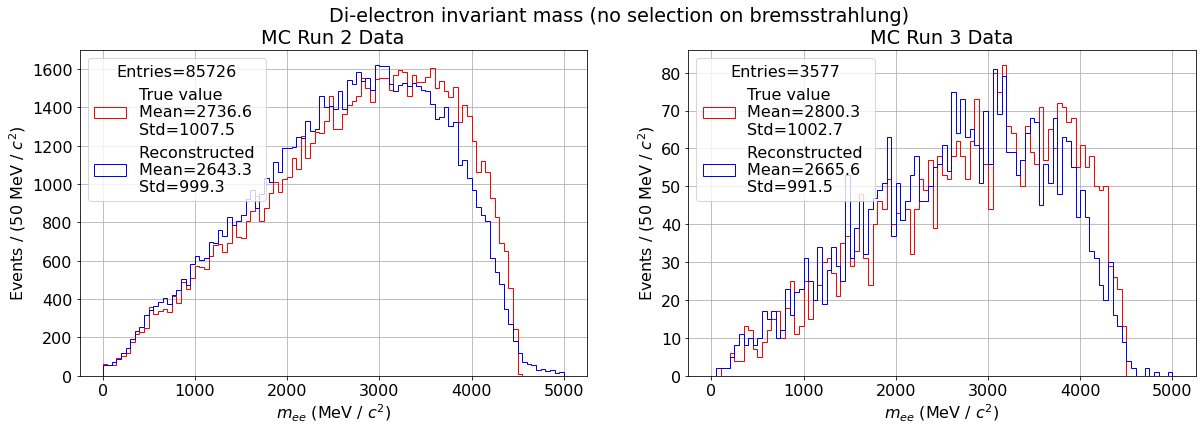

In [40]:
'''Invariant mass graph TRUE and reconstructed - no selection on brem - leptonic '''



fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))

fig.suptitle(f'Di-electron invariant mass (no selection on bremsstrahlung)')
ax1.hist(ee_TRUE_M_lep, bins=100, range=(0, 5000), histtype='step', color='r', label=f'True value \nMean={round(ee_TRUE_M_lep.mean(), 1)} \nStd={round(ee_TRUE_M_lep.std(), 1)}')
ax1.hist(ee_REC_M_lep, bins=100, range=(0, 5000), histtype='step', color='b', label=f'Reconstructed \nMean={round(ee_REC_M_lep.mean(), 1)} \nStd={round(ee_REC_M_lep.std(), 1)}')
ax2.hist(ee_TRUE_M_lep_UP, bins=100, range=(0, 5000), histtype='step', color='r', label=f'True value \nMean={round(ee_TRUE_M_lep_UP.mean(), 1)} \nStd={round(ee_TRUE_M_lep_UP.std(), 1)}')
ax2.hist(ee_REC_M_lep_UP, bins=100, range=(0, 5000), histtype='step', color='b', label=f'Reconstructed \nMean={round(ee_REC_M_lep_UP.mean(), 1)} \nStd={round(ee_REC_M_lep_UP.std(), 1)}')
ax1.grid()
ax2.grid()
ax1.set_title('MC Run 2 Data')
ax2.set_title('MC Run 3 Data')
ax1.set_ylabel(r'Events / (50 MeV / $c^2$)')
ax1.set_xlabel(r'$m_{ee}$ (MeV / $c^2$)')
ax2.set_ylabel(r'Events / (50 MeV / $c^2$)')
ax2.set_xlabel(r'$m_{ee}$ (MeV / $c^2$)')
ax1.legend(loc='upper left', title=f'Entries={len(ee_TRUE_M_lep)}')
ax2.legend(loc='upper left', title=f'Entries={len(ee_TRUE_M_lep_UP)}')


plt.show()

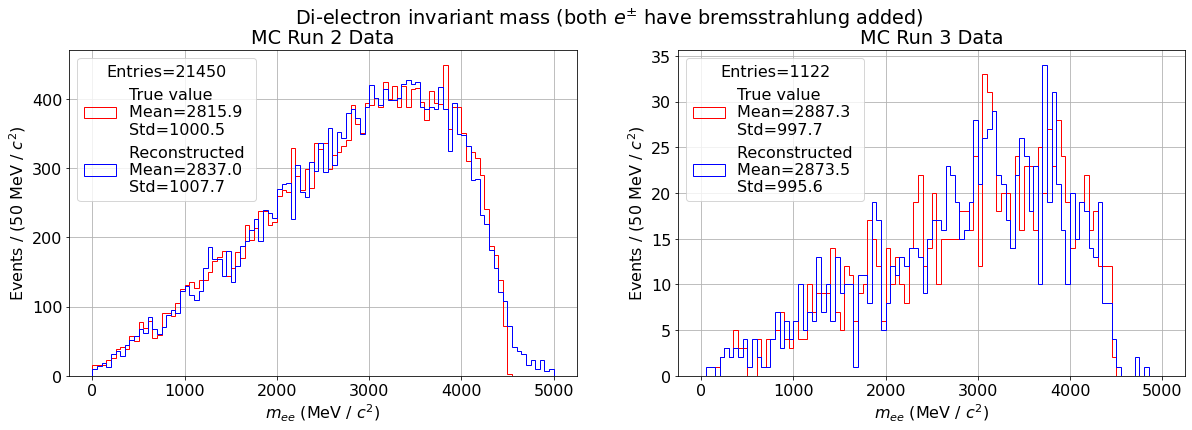

In [42]:
'''Invariant mass graph TRUE and reconstructed -  brem = 2 - leptonic '''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))

fig.suptitle(r'Di-electron invariant mass (both $e^{\pm}$ have bremsstrahlung added)')

ax1.hist(ee_TRUE_M_lep_B2, bins=100, range=(0, 5000), histtype='step', color='r', label=f'True value \nMean={round(ee_TRUE_M_lep_B2.mean(), 1)} \nStd={round(ee_TRUE_M_lep_B2.std(), 1)}')
ax1.hist(ee_REC_M_lep_B2, bins=100, range=(0, 5000), histtype='step', color='b', label=f'Reconstructed \nMean={round(ee_REC_M_lep_B2.mean(), 1)} \nStd={round(ee_REC_M_lep_B2.std(), 1)}')
ax2.hist(ee_TRUE_M_lep_B2_UP, bins=100, range=(0, 5000), histtype='step', color='r', label=f'True value \nMean={round(ee_TRUE_M_lep_B2_UP.mean(), 1)} \nStd={round(ee_TRUE_M_lep_B2_UP.std(), 1)}')
ax2.hist(ee_REC_M_lep_B2_UP, bins=100, range=(0, 5000), histtype='step', color='b', label=f'Reconstructed \nMean={round(ee_REC_M_lep_B2_UP.mean(), 1)} \nStd={round(ee_REC_M_lep_B2_UP.std(), 1)}')
ax1.grid()
ax2.grid()
ax1.set_title('MC Run 2 Data')
ax2.set_title('MC Run 3 Data')
ax1.set_ylabel(r'Events / (50 MeV / $c^2$)')
ax1.set_xlabel(r'$m_{ee}$ (MeV / $c^2$)')
ax2.set_ylabel(r'Events / (50 MeV / $c^2$)')
ax2.set_xlabel(r'$m_{ee}$ (MeV / $c^2$)')
ax1.legend(loc='upper left', title=f'Entries={len(ee_TRUE_M_lep_B2)}')
ax2.legend(loc='upper left', title=f'Entries={len(ee_TRUE_M_lep_B2_UP)}')

plt.show()

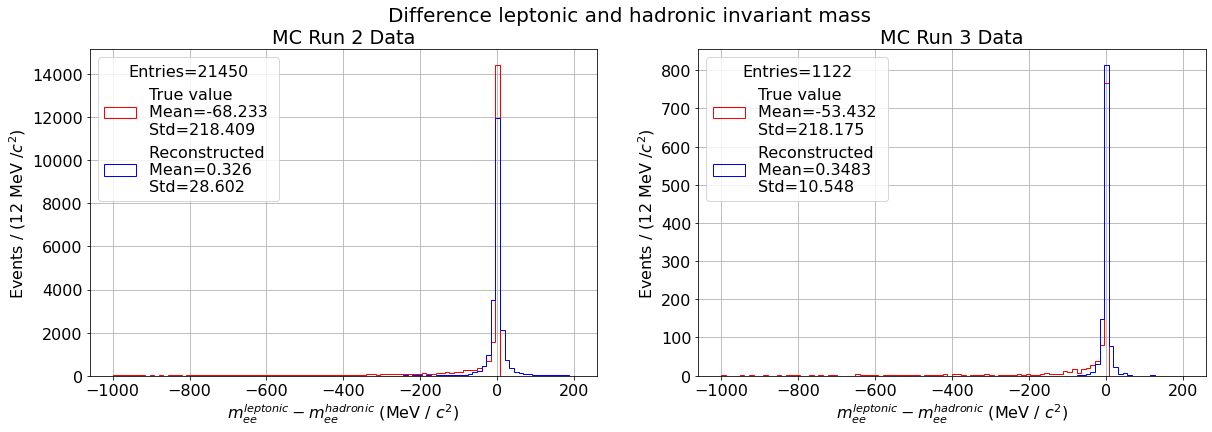

In [43]:
'''FSR TRUE and Reconstructed'''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle(r'Difference leptonic and hadronic invariant mass', fontsize=20)
ax1.hist(diff_TRUE_M_LH, bins=100, range=(-1000, 200), histtype='step', color='r', label=f'True value \nMean={round(diff_TRUE_M_LH.mean(), 3)} \nStd={round(diff_TRUE_M_LH.std(), 3)}')
ax1.hist(diff_REC_M_LH, bins=100, range=(-1000, 200), histtype='step', color='b', label=f'Reconstructed \nMean={round(diff_REC_M_LH.mean(), 4)} \nStd={round(diff_REC_M_LH.std(), 3)}')
ax2.hist(diff_TRUE_M_LH_UP, bins=100, range=(-1000, 200), histtype='step', color='r', label=f'True value \nMean={round(diff_TRUE_M_LH_UP.mean(), 3)} \nStd={round(diff_TRUE_M_LH_UP.std(), 3)}')
ax2.hist(diff_REC_M_LH_UP, bins=100, range=(-1000, 200), histtype='step', color='b', label=f'Reconstructed \nMean={round(diff_REC_M_LH_UP.mean(), 4)} \nStd={round(diff_REC_M_LH_UP.std(), 3)}')
ax1.grid()
ax2.grid()
ax1.set_title('MC Run 2 Data')
ax2.set_title('MC Run 3 Data')
ax1.set_ylabel(r'Events / (12 MeV /$c^2$)')
ax1.set_xlabel(r'$m^{leptonic}_{ee} - m^{hadronic}_{ee}$ (MeV / $c^2$)')
ax2.set_ylabel(r'Events / (12 MeV /$c^2$)')
ax2.set_xlabel(r'$m^{leptonic}_{ee} - m^{hadronic}_{ee}$ (MeV / $c^2$)')
ax1.legend(loc='upper left', title=f'Entries={len(diff_TRUE_M_LH)}')
ax2.legend(loc='upper left', title=f'Entries={len(diff_TRUE_M_LH_UP)}')



plt.show()

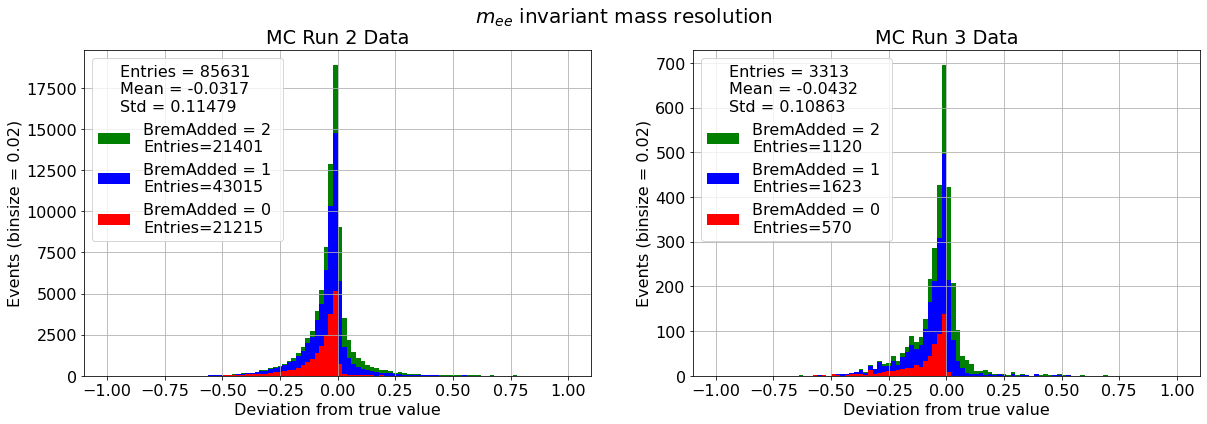

In [44]:
'''Integrated plot, all bremadded categories'''


alldata = pd.concat([res_lep_B0, res_lep_B1, res_lep_B2])
alldata_UP = pd.concat([res_lep_B0_UP, res_lep_B1_UP, res_lep_B2_UP])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle(r'$m_{ee}$ invariant mass resolution', fontsize=20)
ax1.hist(pd.concat([res_lep_B2, res_lep_B1, res_lep_B0], ignore_index=True), bins=100, range=(-1, 1), histtype='stepfilled', color='g', label=f'BremAdded = 2 \nEntries={len(res_lep_B2)}')
ax1.hist(pd.concat([res_lep_B1, res_lep_B0], ignore_index=True), bins=100, range=(-1, 1), histtype='stepfilled', color='b', label=f'BremAdded = 1 \nEntries={len(res_lep_B1)}')
ax1.hist(res_lep_B0, bins=100, range=(-1, 1), histtype='stepfilled', color='r', label=f'BremAdded = 0 \nEntries={len(res_lep_B0)}')

ax2.hist(pd.concat([res_lep_B2_UP, res_lep_B1_UP, res_lep_B0_UP], ignore_index=True), bins=100, range=(-1, 1), histtype='stepfilled', color='g', label=f'BremAdded = 2 \nEntries={len(res_lep_B2_UP)}')
ax2.hist(pd.concat([res_lep_B1_UP, res_lep_B0_UP], ignore_index=True), bins=100, range=(-1, 1), histtype='stepfilled', color='b', label=f'BremAdded = 1 \nEntries={len(res_lep_B1_UP)}')
ax2.hist(res_lep_B0_UP, bins=100, range=(-1, 1), histtype='stepfilled', color='r', label=f'BremAdded = 0 \nEntries={len(res_lep_B0_UP)}')

ax1.grid()
ax2.grid()
ax1.set_title('MC Run 2 Data')
ax2.set_title('MC Run 3 Data')
ax1.set_ylabel(r'Events (binsize = 0.02)')
ax1.set_xlabel(r'Deviation from true value')
ax2.set_ylabel(r'Events (binsize = 0.02)')
ax2.set_xlabel(r'Deviation from true value')
ax1.legend(loc='upper left', title=f'Entries = {len(alldata)} \nMean = {round(alldata.mean(), 4)} \nStd = {round(alldata.std(), 5)}')
ax2.legend(loc='upper left', title=f'Entries = {len(alldata_UP)} \nMean = {round(alldata_UP.mean(), 4)} \nStd = {round(alldata_UP.std(), 5)}')

plt.show()



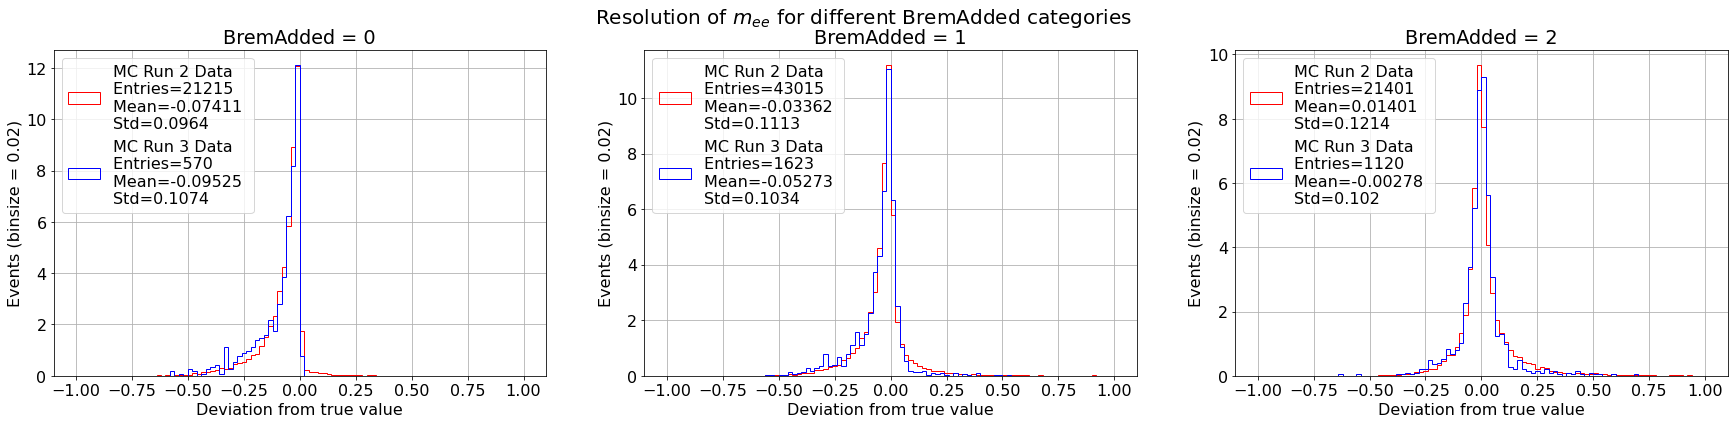

In [45]:
'''Invariant mass resolution for different bremadded categories'''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 6))
fig.suptitle(r'Resolution of $m_{ee}$ for different BremAdded categories', fontsize=20)
ax1.hist(res_lep_B0, bins=100, range=(-1, 1), histtype='step', density=True, color='r', label=f'MC Run 2 Data \nEntries={len(res_lep_B0)} \nMean={round(res_lep_B0.mean(), 5)} \nStd={round(res_lep_B0.std(), 4)}')
ax1.hist(res_lep_B0_UP, bins=100, range=(-1, 1), histtype='step', density=True, color='b', label=f'MC Run 3 Data \nEntries={len(res_lep_B0_UP)} \nMean={round(res_lep_B0_UP.mean(), 5)} \nStd={round(res_lep_B0_UP.std(), 4)}')
ax2.hist(res_lep_B1, bins=100, range=(-1, 1), histtype='step', density=True, color='r', label=f'MC Run 2 Data \nEntries={len(res_lep_B1)} \nMean={round(res_lep_B1.mean(), 5)} \nStd={round(res_lep_B1.std(), 4)}')
ax2.hist(res_lep_B1_UP, bins=100, range=(-1, 1), histtype='step', density=True, color='b', label=f'MC Run 3 Data \nEntries={len(res_lep_B1_UP)} \nMean={round(res_lep_B1_UP.mean(), 5)} \nStd={round(res_lep_B1_UP.std(), 4)}')
ax3.hist(res_lep_B2, bins=100, range=(-1, 1), histtype='step', density=True, color='r', label=f'MC Run 2 Data \nEntries={len(res_lep_B2)} \nMean={round(res_lep_B2.mean(), 5)} \nStd={round(res_lep_B2.std(), 4)}')
ax3.hist(res_lep_B2_UP, bins=100, range=(-1, 1), histtype='step', density=True, color='b', label=f'MC Run 3 Data \nEntries={len(res_lep_B2_UP)} \nMean={round(res_lep_B2_UP.mean(), 5)} \nStd={round(res_lep_B2_UP.std(), 4)}')

ax1.grid()
ax2.grid()
ax3.grid()
ax1.set_title(r'BremAdded = 0')
ax2.set_title(r'BremAdded = 1')
ax3.set_title(r'BremAdded = 2')
ax1.set_ylabel(r'Events (binsize = 0.02)')
ax1.set_xlabel(r'Deviation from true value')
ax2.set_ylabel(r'Events (binsize = 0.02)')
ax2.set_xlabel(r'Deviation from true value')
ax3.set_ylabel(r'Events (binsize = 0.02)')
ax3.set_xlabel(r'Deviation from true value')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')
ax3.legend(loc='upper left')

plt.show()

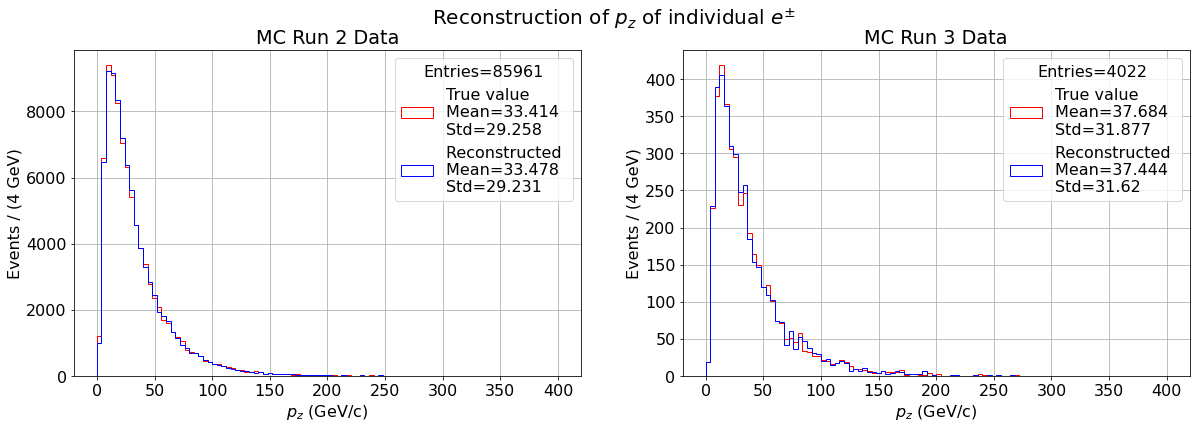

In [46]:
'''PZ for individual electrons'''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle(r'Reconstruction of $p_z$ of individual $e^{\pm}$', fontsize=20)
ax1.hist(e_TRUE_PZ_B1, bins=100, range=(0, 400000), histtype='step', color='r', label=f'True value \nMean={round(e_TRUE_PZ_B1.mean()/1000, 3)} \nStd={round(e_TRUE_PZ_B1.std()/1000, 3)}')
ax1.hist(e_REC_PZ_B1, bins=100, range=(0, 400000), histtype='step', color='b', label=f'Reconstructed \nMean={round(e_REC_PZ_B1.mean()/1000, 3)} \nStd={round(e_REC_PZ_B1.std()/1000, 3)}')
ax2.hist(e_TRUE_PZ_B1_UP, bins=100, range=(0, 400000), histtype='step', color='r', label=f'True value \nMean={round(e_TRUE_PZ_B1_UP.mean()/1000, 3)} \nStd={round(e_TRUE_PZ_B1_UP.std()/1000, 3)}')
ax2.hist(e_REC_PZ_B1_UP, bins=100, range=(0, 400000), histtype='step', color='b', label=f'Reconstructed \nMean={round(e_REC_PZ_B1_UP.mean()/1000, 3)} \nStd={round(e_REC_PZ_B1_UP.std()/1000, 3)}')
ax1.grid()
ax2.grid()
ax1.set_title('MC Run 2 Data')
ax2.set_title('MC Run 3 Data')
ax1.set_ylabel(r'Events / (4 GeV)')
ax1.set_xlabel(r'$p_z$ (GeV/c)')


ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/(1e3)))
ax1.xaxis.set_major_formatter(ticks_x)
ax2.xaxis.set_major_formatter(ticks_x)
ax2.set_ylabel(r'Events / (4 GeV)')
ax2.set_xlabel(r'$p_z$ (GeV/c)')

ax1.legend(loc='upper right', title=f'Entries={len(e_TRUE_PZ_B1)}')
ax2.legend(loc='upper right', title=f'Entries={len(e_TRUE_PZ_B1_UP)}')



plt.show()

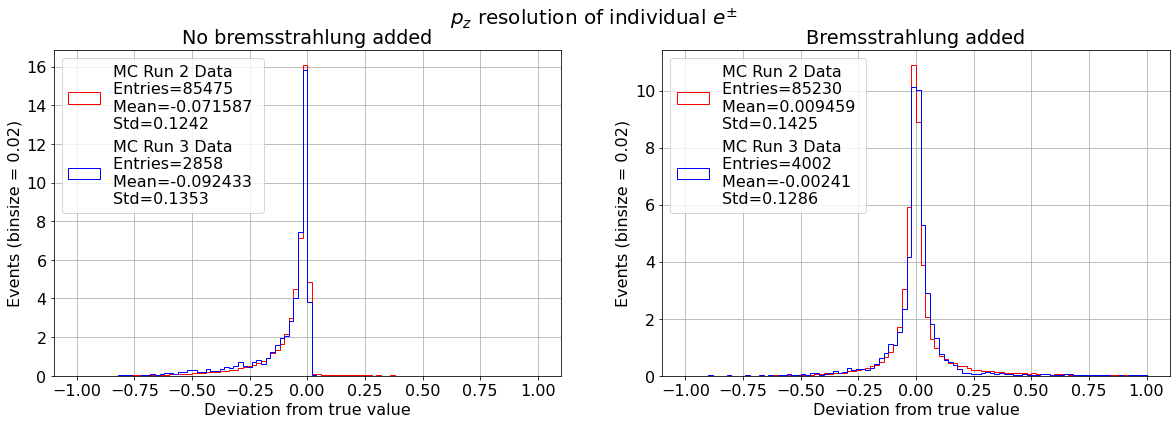

In [47]:
'''PZ resolution for individual electrons'''


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle(r'$p_z$ resolution of individual $e^{\pm}$', fontsize=20)
ax1.hist(e_res_PZ_B0, bins=100, range=(-1, 1), density=True, histtype='step', color='r', label=f'MC Run 2 Data \nEntries={len(e_res_PZ_B0)} \nMean={round(e_res_PZ_B0.mean(), 6)} \nStd={round(e_res_PZ_B0.std(), 4)}')
ax1.hist(e_res_PZ_B0_UP, bins=100, range=(-1, 1), density=True, histtype='step', color='b', label=f'MC Run 3 Data \nEntries={len(e_res_PZ_B0_UP)}  \nMean={round(e_res_PZ_B0_UP.mean(), 6)} \nStd={round(e_res_PZ_B0_UP.std(), 4)}')
ax2.hist(e_res_PZ_B1, bins=100, range=(-1, 1), density=True, histtype='step', color='r', label=f'MC Run 2 Data \nEntries={len(e_res_PZ_B1)} \nMean={round(e_res_PZ_B1.mean(), 6)} \nStd={round(e_res_PZ_B1.std(), 4)}')
ax2.hist(e_res_PZ_B1_UP, bins=100, range=(-1, 1), density=True, histtype='step', color='b', label=f'MC Run 3 Data \nEntries={len(e_res_PZ_B1_UP)} \nMean={round(e_res_PZ_B1_UP.mean(), 6)} \nStd={round(e_res_PZ_B1_UP.std(), 4)}')
ax1.grid()
ax2.grid()
ax1.set_title('No bremsstrahlung added')
ax2.set_title('Bremsstrahlung added')
ax1.set_ylabel(r'Events (binsize = 0.02)')
ax1.set_xlabel(r'Deviation from true value')
ax2.set_ylabel(r'Events (binsize = 0.02)')
ax2.set_xlabel(r'Deviation from true value')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.show()

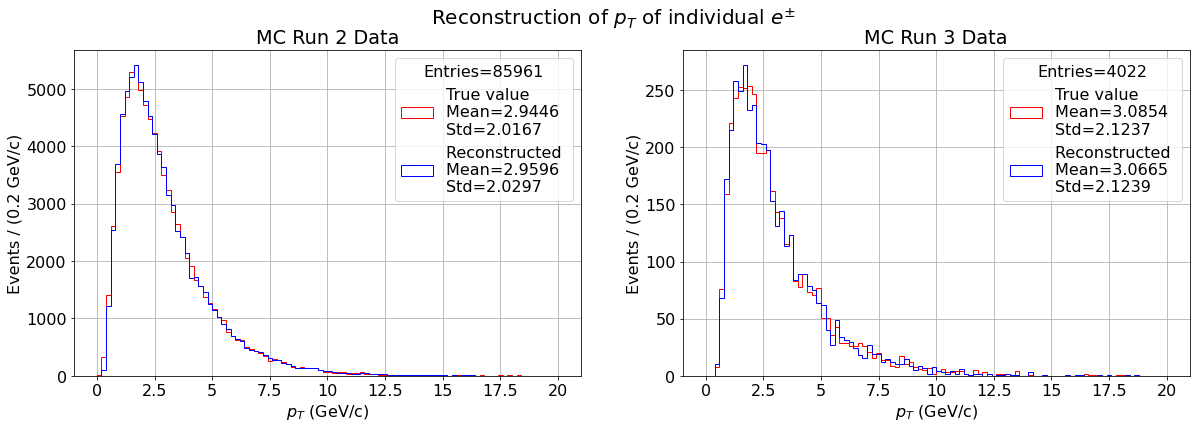

In [48]:
'''PT for individual electrons'''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle(r'Reconstruction of $p_T$ of individual $e^{\pm}$', fontsize=20)
ax1.hist(e_TRUE_PT_B1, bins=100, range=(0, 20000), histtype='step', color='r', label=f'True value \nMean={round(e_TRUE_PT_B1.mean()/1000, 4)} \nStd={round(e_TRUE_PT_B1.std()/1000, 4)}')
ax1.hist(e_REC_PT_B1, bins=100, range=(0, 20000), histtype='step', color='b', label=f'Reconstructed \nMean={round(e_REC_PT_B1.mean()/1000, 4)} \nStd={round(e_REC_PT_B1.std()/1000, 4)}')
ax2.hist(e_TRUE_PT_B1_UP, bins=100, range=(0, 20000), histtype='step', color='r', label=f'True value \nMean={round(e_TRUE_PT_B1_UP.mean()/1000, 4)} \nStd={round(e_TRUE_PT_B1_UP.std()/1000, 4)}')
ax2.hist(e_REC_PT_B1_UP, bins=100, range=(0, 20000), histtype='step', color='b', label=f'Reconstructed \nMean={round(e_REC_PT_B1_UP.mean()/1000, 4)} \nStd={round(e_REC_PT_B1_UP.std()/1000, 4)}')
ax1.grid()
ax2.grid()
ax1.set_title('MC Run 2 Data')
ax2.set_title('MC Run 3 Data')
ax1.set_ylabel(r'Events / (0.2 GeV/c)')
ax1.set_xlabel(r'$p_T$ (GeV/c)')


ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/(1e3)))
ax1.xaxis.set_major_formatter(ticks_x)
ax2.xaxis.set_major_formatter(ticks_x)
ax2.set_ylabel(r'Events / (0.2 GeV/c)')
ax2.set_xlabel(r'$p_T$ (GeV/c)')

ax1.legend(loc='upper right', title=f'Entries={len(e_TRUE_PT_B1)}')
ax2.legend(loc='upper right', title=f'Entries={len(e_TRUE_PT_B1_UP)}')



plt.show()

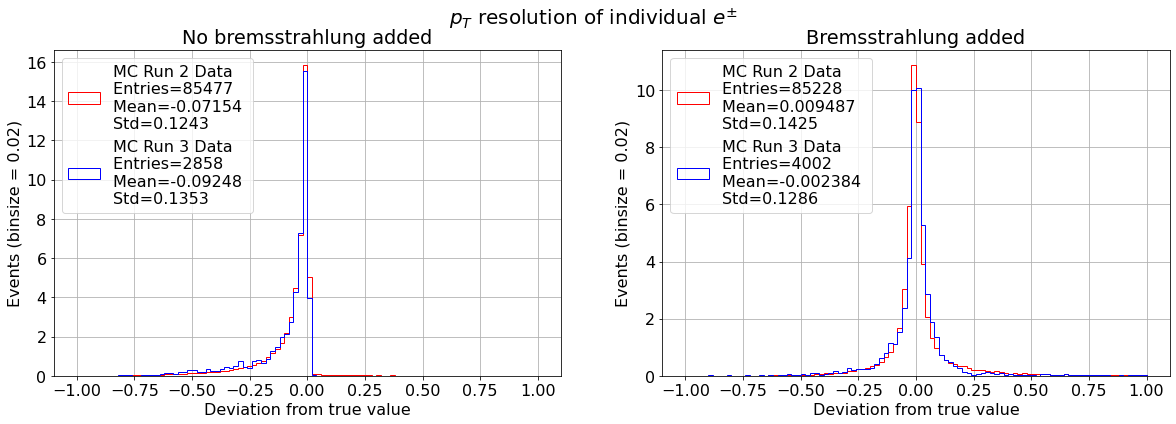

In [49]:
'''PT resolution for individual electrons'''


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle(r'$p_T$ resolution of individual $e^{\pm}$', fontsize=20)
ax1.hist(e_res_PT_B0, bins=100, range=(-1, 1), density=True, histtype='step', color='r', label=f'MC Run 2 Data \nEntries={len(e_res_PT_B0)} \nMean={round(e_res_PT_B0.mean(), 5)} \nStd={round(e_res_PT_B0.std(), 4)}')
ax1.hist(e_res_PT_B0_UP, bins=100, range=(-1, 1), density=True, histtype='step', color='b', label=f'MC Run 3 Data \nEntries={len(e_res_PT_B0_UP)}  \nMean={round(e_res_PT_B0_UP.mean(), 5)} \nStd={round(e_res_PT_B0_UP.std(), 4)}')
ax2.hist(e_res_PT_B1, bins=100, range=(-1, 1), density=True, histtype='step', color='r', label=f'MC Run 2 Data \nEntries={len(e_res_PT_B1)} \nMean={round(e_res_PT_B1.mean(), 6)} \nStd={round(e_res_PT_B1.std(), 4)}')
ax2.hist(e_res_PT_B1_UP, bins=100, range=(-1, 1), density=True, histtype='step', color='b', label=f'MC Run 3 Data \nEntries={len(e_res_PT_B1_UP)} \nMean={round(e_res_PT_B1_UP.mean(), 6)} \nStd={round(e_res_PT_B1_UP.std(), 4)}')
ax1.grid()
ax2.grid()
ax1.set_title('No bremsstrahlung added')
ax2.set_title('Bremsstrahlung added')
ax1.set_ylabel(r'Events (binsize = 0.02)')
ax1.set_xlabel(r'Deviation from true value')
ax2.set_ylabel(r'Events (binsize = 0.02)')
ax2.set_xlabel(r'Deviation from true value')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.show()

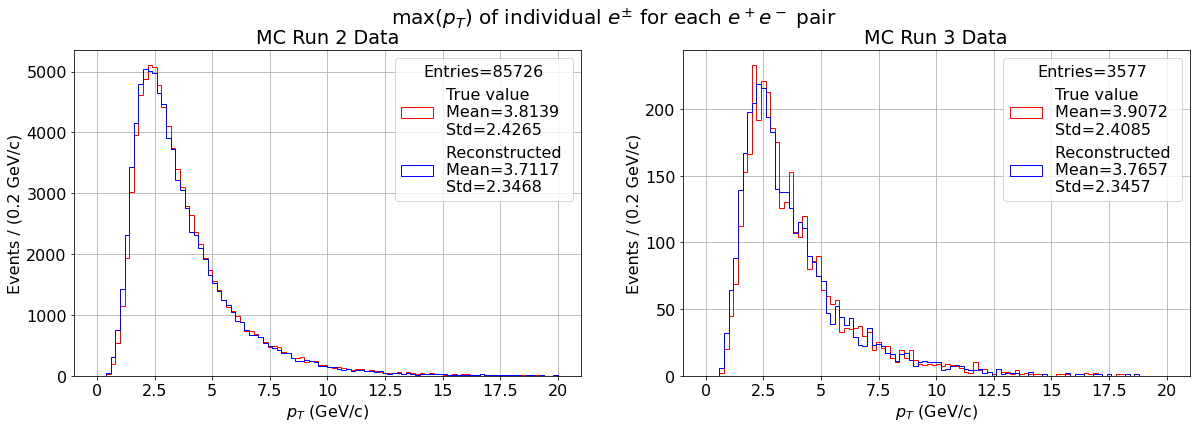

In [50]:
'''PT for individual electrons'''

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 6))
fig.suptitle(r'max($p_T$) of individual $e^{\pm}$ for each $e^+e^-$ pair', fontsize=20)
ax1.hist(PT_max_TRUE, bins=100, range=(0, 20000), histtype='step', color='r', label=f'True value \nMean={round(PT_max_TRUE.mean()/1000, 4)} \nStd={round(PT_max_TRUE.std()/1000, 4)}')
ax1.hist(PT_max_REC, bins=100, range=(0, 20000), histtype='step', color='b', label=f'Reconstructed \nMean={round(PT_max_REC.mean()/1000, 4)} \nStd={round(PT_max_REC.std()/1000, 4)}')
ax2.hist(PT_max_TRUE_UP, bins=100, range=(0, 20000), histtype='step', color='r', label=f'True value \nMean={round(PT_max_TRUE_UP.mean()/1000, 4)} \nStd={round(PT_max_TRUE_UP.std()/1000, 4)}')
ax2.hist(PT_max_REC_UP, bins=100, range=(0, 20000), histtype='step', color='b', label=f'Reconstructed \nMean={round(PT_max_REC_UP.mean()/1000, 4)} \nStd={round(PT_max_REC_UP.std()/1000, 4)}')
ax1.grid()
ax2.grid()
ax1.set_title('MC Run 2 Data')
ax2.set_title('MC Run 3 Data')
ax1.set_ylabel(r'Events / (0.2 GeV/c)')
ax1.set_xlabel(r'$p_T$ (GeV/c)')


ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/(1e3)))
ax1.xaxis.set_major_formatter(ticks_x)
ax2.xaxis.set_major_formatter(ticks_x)
ax2.set_ylabel(r'Events / (0.2 GeV/c)')
ax2.set_xlabel(r'$p_T$ (GeV/c)')

ax1.legend(loc='upper right', title=f'Entries={len(PT_max_TRUE)}')
ax2.legend(loc='upper right', title=f'Entries={len(PT_max_TRUE_UP)}')



plt.show()

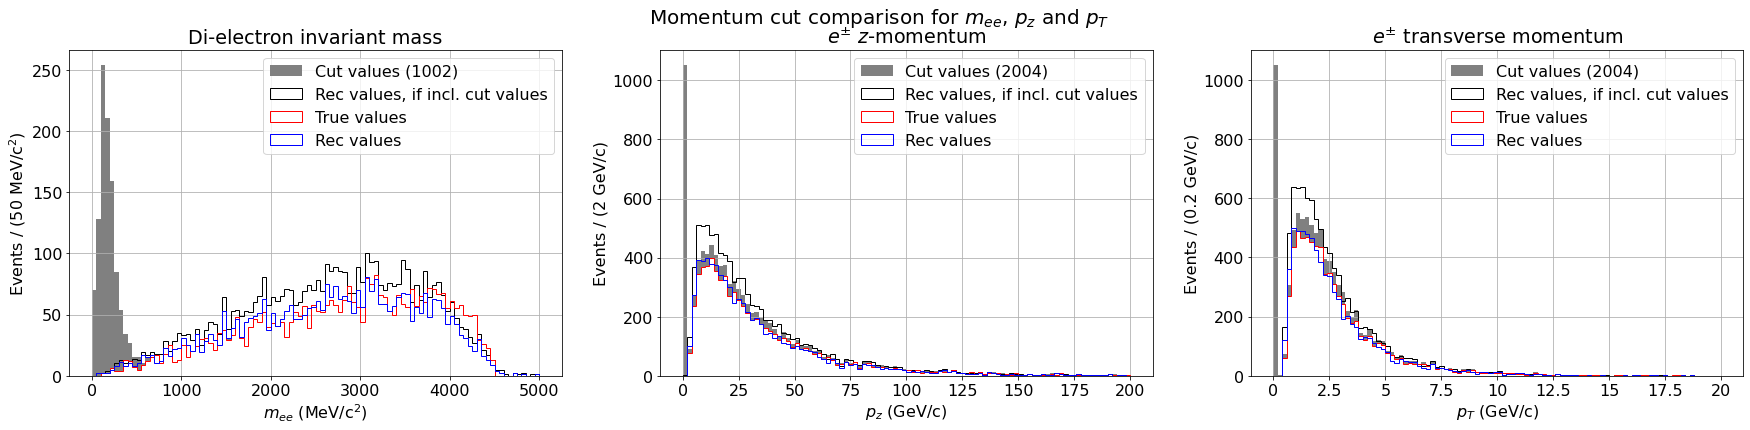

In [51]:
'''  momentum cut comparison between inv mass, pt and pz'''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 6))
fig.suptitle(r'Momentum cut comparison for $m_{ee}$, $p_z$ and $p_T$', fontsize=20)

ax1.hist(ee_TRUE_M_lep_UP_nocut, bins=100, range=(0, 5000), histtype='stepfilled', color='grey', label=f'Cut values ({len(ee_TRUE_M_lep_UP_nocut)-len(ee_TRUE_M_lep_UP)})')
ax1.hist(ee_TRUE_M_lep_UP, bins=100, range=(0, 5000), histtype='stepfilled', color='white')
ax1.hist(ee_REC_M_lep_UP_nocut, bins=100, range=(0, 5000), histtype='step', color='black', label=f'Rec values, if incl. cut values')
ax1.hist(ee_TRUE_M_lep_UP, bins=100, range=(0, 5000), histtype='step', color='r', label=f'True values')
ax1.hist(ee_REC_M_lep_UP, bins=100, range=(0, 5000), histtype='step', color='b', label=f'Rec values')


ax2.hist(e_TRUE_PZ_UP_nocut, bins=100, range=(0, 200000), histtype='stepfilled', color='grey', label=f'Cut values ({len(e_TRUE_PZ_UP_nocut)-len(e_TRUE_PZ_UP_cut)})')
ax2.hist(e_TRUE_PZ_UP_cut, bins=100, range=(0, 200000), histtype='stepfilled', color='white')
ax2.hist(e_REC_PZ_UP_nocut, bins=100, range=(0, 200000), histtype='step', color='black', label=f'Rec values, if incl. cut values')
ax2.hist(e_TRUE_PZ_UP_cut, bins=100, range=(0, 200000), histtype='step', color='r', label=f'True values')
ax2.hist(e_REC_PZ_UP_cut, bins=100, range=(0, 200000), histtype='step', color='blue', label=f'Rec values')


ax3.hist(e_TRUE_PT_UP_nocut, bins=100, range=(0, 20000), histtype='stepfilled', color='grey', label=f'Cut values ({len(e_TRUE_PT_UP_nocut)-len(e_TRUE_PT_UP_cut)})')
ax3.hist(e_TRUE_PT_UP_cut, bins=100, range=(0, 20000), histtype='stepfilled', color='white')
ax3.hist(e_REC_PT_UP_nocut, bins=100, range=(0, 20000), histtype='step', color='black', label=f'Rec values, if incl. cut values')
ax3.hist(e_TRUE_PT_UP_cut, bins=100, range=(0, 20000), histtype='step', color='r', label=f'True values')
ax3.hist(e_REC_PT_UP_cut, bins=100, range=(0, 20000), histtype='step', color='blue', label=f'Rec values')


ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/(1e3)))
ax2.xaxis.set_major_formatter(ticks_x)
ax3.xaxis.set_major_formatter(ticks_x)
ax1.grid()
ax2.grid()
ax3.grid()
ax1.set_title(r'Di-electron invariant mass')
ax2.set_title(r'$e^{\pm}$ $z$-momentum')
ax3.set_title(r'$e^{\pm}$ transverse momentum')
ax1.set_ylabel(r'Events / (50 MeV/c$^2$)')
ax1.set_xlabel(r'$m_{ee}$ (MeV/c$^2$)')
ax2.set_ylabel(r'Events / (2 GeV/c)')
ax2.set_xlabel(r'$p_z$ (GeV/c)')
ax3.set_ylabel(r'Events / (0.2 GeV/c)')
ax3.set_xlabel(r'$p_T$ (GeV/c)')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')

plt.show()

In [ ]:
'''  momentum cut comparison between inv mass, pt and pz'''

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30, 6))
fig.suptitle(r'Momentum cut comparison for $m_{ee}$, $p_z$ and $p_T$', fontsize=20)

ax1.hist(ee_TRUE_M_lep_UP_nocut, bins=100, range=(0, 5000), histtype='stepfilled', color='grey', label=f'Cut values ({len(ee_TRUE_M_lep_UP_nocut)-len(ee_TRUE_M_lep_UP)})')
ax1.hist(ee_TRUE_M_lep_UP, bins=100, range=(0, 5000), histtype='stepfilled', color='white')
ax1.hist(ee_REC_M_lep_UP_nocut, bins=100, range=(0, 5000), histtype='step', color='black', label=f'Rec values, if incl. cut values')
ax1.hist(ee_TRUE_M_lep_UP, bins=100, range=(0, 5000), histtype='step', color='r', label=f'True values')
ax1.hist(ee_REC_M_lep_UP, bins=100, range=(0, 5000), histtype='step', color='b', label=f'Rec values')


ax2.hist(e_TRUE_PZ_UP_nocut, bins=100, range=(0, 200000), histtype='stepfilled', color='grey', label=f'Cut values ({len(e_TRUE_PZ_UP_nocut)-len(e_TRUE_PZ_UP_cut)})')
ax2.hist(e_TRUE_PZ_UP_cut, bins=100, range=(0, 200000), histtype='stepfilled', color='white')
ax2.hist(e_REC_PZ_UP_nocut, bins=100, range=(0, 200000), histtype='step', color='black', label=f'Rec values, if incl. cut values')
ax2.hist(e_TRUE_PZ_UP_cut, bins=100, range=(0, 200000), histtype='step', color='r', label=f'True values')
ax2.hist(e_REC_PZ_UP_cut, bins=100, range=(0, 200000), histtype='step', color='blue', label=f'Rec values')


ax3.hist(e_TRUE_PT_UP_nocut, bins=100, range=(0, 20000), histtype='stepfilled', color='grey', label=f'Cut values ({len(e_TRUE_PT_UP_nocut)-len(e_TRUE_PT_UP_cut)})')
ax3.hist(e_TRUE_PT_UP_cut, bins=100, range=(0, 20000), histtype='stepfilled', color='white')
ax3.hist(e_REC_PT_UP_nocut, bins=100, range=(0, 20000), histtype='step', color='black', label=f'Rec values, if incl. cut values')
ax3.hist(e_TRUE_PT_UP_cut, bins=100, range=(0, 20000), histtype='step', color='r', label=f'True values')
ax3.hist(e_REC_PT_UP_cut, bins=100, range=(0, 20000), histtype='step', color='blue', label=f'Rec values')


ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/(1e3)))
ax2.xaxis.set_major_formatter(ticks_x)
ax3.xaxis.set_major_formatter(ticks_x)
ax1.grid()
ax2.grid()
ax3.grid()
ax1.set_title(r'Di-electron invariant mass')
ax2.set_title(r'$e^{\pm}$ $z$-momentum')
ax3.set_title(r'$e^{\pm}$ transverse momentum')
ax1.set_ylabel(r'Events / (50 MeV/c$^2$)')
ax1.set_xlabel(r'$m_{ee}$ (MeV/c$^2$)')
ax2.set_ylabel(r'Events / (2 GeV/c)')
ax2.set_xlabel(r'$p_z$ (GeV/c)')
ax3.set_ylabel(r'Events / (0.2 GeV/c)')
ax3.set_xlabel(r'$p_T$ (GeV/c)')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')

plt.show()